## Chapter 2: Linear regression

#### The Normal Equation

In [1]:
#create datasets
import numpy as np

X = 2 * np.random.rand(100,1)
#print(len(X))
y = 4 + 3*X + np.random.randn(100,1)
print(len(y))

100


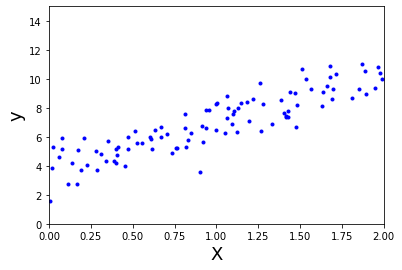

In [2]:
#visualization
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("X",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [3]:
#prepare data
X_b = np.c_[np.ones((100,1)),X] #add x0 =1 to each instance
#print(X)
#print(X_b)

In [4]:
#The normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
#y = 4 + 3*X
print(theta)

[[3.70838914]
 [3.30204859]]


In [6]:
#predict
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
#print(X_new_b)
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.70838914],
       [10.31248633]])

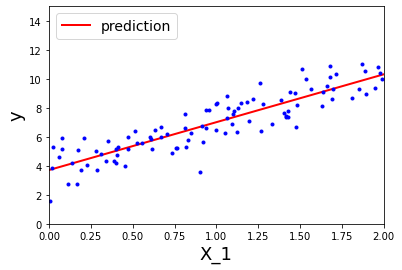

In [7]:
#visualization
plt.plot(X_new,y_predict,"r-",linewidth=2,label="prediction")
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
plt.show()

## SVD

In [8]:
#y = 4+3X
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.70838914]), array([[3.30204859]]))

## Gradient Descent

## Batch Gradient Descent

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = len(X_b)
print(m)
theta = np.random.randn(2,1) #random theta

for interation in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    print(f"\nround:{interation}",theta)

100

round:0 [[0.26031038]
 [1.76716782]]

round:1 [[1.24691234]
 [2.81856057]]

round:2 [[1.83275847]
 [3.41586433]]

round:3 [[2.18586224]
 [3.75029177]]

round:4 [[2.40363643]
 [3.93268109]]

round:5 [[2.54256501]
 [4.02727635]]

round:6 [[2.63540451]
 [4.07131056]]

round:7 [[2.70115587]
 [4.08635826]]

round:8 [[2.75084536]
 [4.08491681]]

round:9 [[2.79087586]
 [4.07422171]]

round:10 [[2.82496966]
 [4.05845831]]

round:11 [[2.85529479]
 [4.04004402]]

round:12 [[2.8831179 ]
 [4.02037164]]

round:13 [[2.90918283]
 [4.00024022]]

round:14 [[2.93393002]
 [3.98010486]]

round:15 [[2.9576238 ]
 [3.96022152]]

round:16 [[2.98042607]
 [3.94073093]]

round:17 [[3.00243916]
 [3.92170729]]

round:18 [[3.02373053]
 [3.9031864 ]]

round:19 [[3.04434727]
 [3.88518205]]

round:20 [[3.06432434]
 [3.86769548]]

round:21 [[3.0836895 ]
 [3.85072085]]

round:22 [[3.10246607]
 [3.83424841]]

round:23 [[3.1206746 ]
 [3.81826633]]

round:24 [[3.13833382]
 [3.80276176]]

round:25 [[3.1554612 ]
 [3.787

In [10]:
#y = 4 + 3X
theta

array([[3.70838914],
       [3.30204859]])

In [11]:
#predicting
X_new_b.dot(theta)

array([[ 3.70838914],
       [10.31248633]])

## Example

- change learning rate and visualization
  -  0.02 
  -  0.1 
  -  0.5

In [12]:
def plot_gradient_descent(theta,eta):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for interation in range(n_iterations):
        if interation < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if interation > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
    plt.xlabel("X_1",fontsize=18)
    plt.ylabel("y",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(f"eta = {eta}",fontsize=16)
        

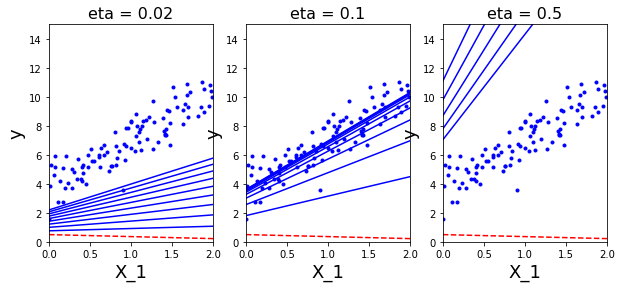

In [13]:
np.random.seed(42) # fixed random
theta = np.random.randn(2,1) #random theta

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1)
plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)

## Stochastic Gradient Descent

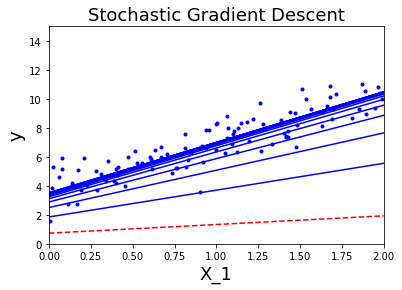

In [14]:
n_epochs = 50
m = len(X_b)
eta = 0.1

t0, t1 = 5,50  #learning rate hyperparameters

def learning_schedult(t):
    return t0 / (t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in  range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)  #sgd term
        xi = X_b[random_index:random_index+1] #sgd term
        yi = y[random_index:random_index+1]  #sgd term
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        #eta = learning_schedult(epoch * m+i)  # learning rate dynamics
        theta = theta - eta*gradients
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([0,2,0,15])
plt.title("Stochastic Gradient Descent",fontsize= 18)
plt.show()

In [15]:
#y = 4+3X
theta

array([[3.70838914],
       [3.30204859]])

## SGD from sklearn

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, random_state=42)

In [17]:
#y = 4+3X
sgd_reg.intercept_ , sgd_reg.coef_

(array([3.70648889]), array([3.33833466]))

## Mini-batch gradient descent

In [21]:
n_iterations = 50
minibatch_size = 20

m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2,1)
eta = 0.1

for interation in range(n_iterations):
    shuffed_indices = np.random.permutation(m) #shuffed data
    #print(shuffed_indices)
    X_b_shuffled = X_b[shuffed_indices]
    y_shuffled = y[shuffed_indices]
    for i in range(0,m,20):
        xi = X_b_shuffled[i:i+minibatch_size] #mini batch
        yi = y_shuffled[i:i+minibatch_size] # minibatch
        gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        theta = theta - eta*gradients



In [22]:
#y= 4+3X
theta

array([[3.72910781],
       [3.3330016 ]])

## Polynomial Regression

In [37]:
# making dataset
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [38]:
#y=  0.5*X^2 + X + 2
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

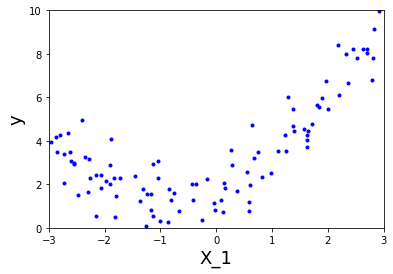

In [44]:
#visualization
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [54]:
#preprocessing
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2 , include_bias=False)
X_poly = poly_features.fit_transform(X)

#print(X_poly)

In [55]:
# model selection
lin_reg = LinearRegression()

#training 
lin_reg.fit(X_poly,y)
lin_reg.intercept_ ,lin_reg.coef_  #y=  0.5*X^2 + X + 2

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

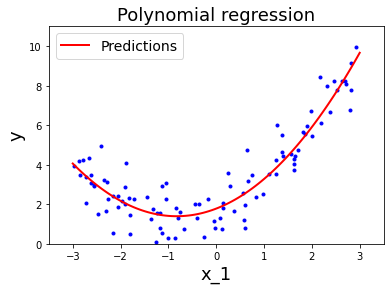

In [67]:
#Visualization
X_new = np.linspace(-3,3,100).reshape(100,1)
#print(X_new)
X_new_poly = poly_features.transform(X_new)
#print(X_new_poly)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("x_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3.5,3.5,0,11])
plt.title("Polynomial regression",fontsize=18)
plt.show()

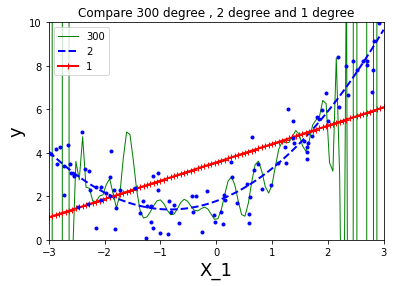

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False) # 300 degree
    std_scaler = StandardScaler() #2 degree
    lin_reg = LinearRegression() #1 degree
    polymonial_regression = Pipeline([
        ("poly_features",poly_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    polymonial_regression.fit(X,y)
    y_newbig = polymonial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)

plt.plot(X,y,"b.",linewidth=3)
plt.axis([-3,3,0,10])
plt.legend(loc="upper left")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.title("Compare 300 degree , 2 degree and 1 degree")
plt.show()

## Learning Curves

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val, y_train , y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors , val_errors = [],[]
    for m in range(1,len(X_train)+1):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

    plt.plot(np.sqrt(train_errors),"r-+",label="train",linewidth=2)
    plt.plot(np.sqrt(val_errors),"b-",label="val",linewidth=3)
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)
    plt.axis([0,80,0,3])
    plt.show()

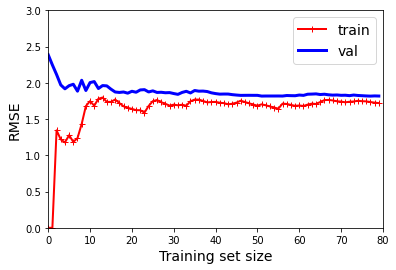

In [95]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

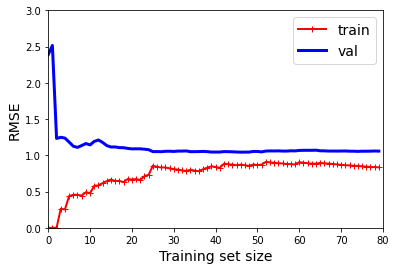

In [110]:
#2 degree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polymonial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2,include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polymonial_regression,X,y)

## Regualized Linear models

## Ridge Regression

In [112]:
#datasets
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)


In [117]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,random_state=42)

ridge_reg.fit(X,y)

ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [116]:
#using SGD
sgd_reg = SGDRegressor(penalty="l2",alpha=1)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.39688459])

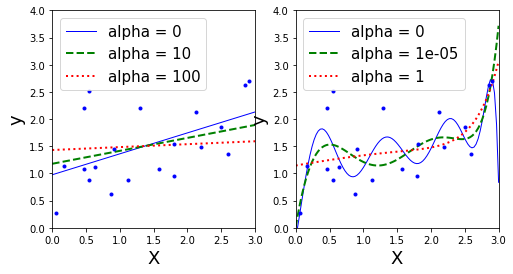

In [133]:
from sklearn.linear_model import Ridge

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha ,style in zip(alphas,("b-","g--","r:")):
        model = model_class(alpha,**model_kargs) if alpha >0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=f"alpha = {alpha}")
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15)
    plt.xlabel("X",fontsize=18)
    plt.ylabel("y",fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42) # 1st degree ==> 0 -> infinite
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42) #polynomial ==> 0-1
